In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [2]:
file_path_1 = r'fullevents.csv'
file_path_2 = r'matches.csv'
file_path_3 = r'passingevents_1.csv'
full_events = pd.read_csv(file_path_1)
matches = pd.read_csv(file_path_2)
passing_events = pd.read_csv(file_path_3)

In [3]:
Huskies_passing_df = passing_events.loc[passing_events.TeamID == 'Huskies'].reset_index(drop = True)
type(Huskies_passing_df)

pandas.core.frame.DataFrame

In [4]:
#三维点插值#在三维空间中，利用实际点的值推算出网格点的值import numpy as np 

point_grid =np.array([[0.0,0.0,0.0],[0.4,0.4,0.4],[0.8,0.8,0.8],[1.0,1.0,1.0]])#网格点坐标

def func(x, y, z):
    return x*(1-x)*np.cos(4*np.pi*x) * (np.sin(4*np.pi*y**2)**2)*z

points = np.random.rand(10, 3)#实际点坐标
values = func(points[:,0], points[:,1],points[:,2])#实际点的值
print(points)
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, point_grid, method='nearest')
print(grid_z0)
#插值计算，计算出网格点的值

[[0.15343312 0.74017514 0.19630821]
 [0.71237482 0.58024463 0.78834357]
 [0.4073716  0.20879627 0.89091159]
 [0.00124656 0.47135351 0.19873285]
 [0.16161594 0.31191794 0.1691754 ]
 [0.62139043 0.99336361 0.39801604]
 [0.07098478 0.08304681 0.98142794]
 [0.60490712 0.32752525 0.49518943]
 [0.30072445 0.89758466 0.58134732]
 [0.50392614 0.30070649 0.23702268]]
[-0.00899418  0.04869341 -0.11296606 -0.11296606]


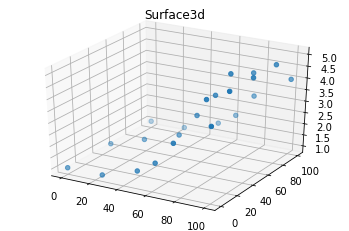

In [5]:
#三维点插值#在三维空间中，利用实际点的值推算出网格点的值import numpy as np 

point_grid = np.array([[0,0,1],[0,50,1],[0,100,1],[25,0,1],[25,50,1.5],[25,100,1],[50,0,1.5],[50,50,2],[50,100,1.5],[62.5,0,2],[62.5,50,3],[62.5,100,2],[75,0,3],[75,50,4],[75,100,3],[85,21,4.5],[85,50,5],[85,79,4.5],[100,0,4],[100,21,5],[100,50,5],[100,79,5],[100,100,4]])#网格点坐标
x = point_grid[:,0]
y = point_grid[:,1]
z = point_grid[:,2]
#x,y,z = np.meshgrid(x,y,z)

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(x,y,z,cmap='Blues')
plt.title('Surface3d')
plt.show()



In [6]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
 
def fun(x): 
    round(x, 2)
    if x >= 0:
        return '+'+str(x)
    else:
        return str(x)


In [7]:
def get_res(X, Y, Z, n):
    # 求方程系数
    sigma_x = 0
    for i in X: sigma_x += i
    sigma_y = 0
    for i in Y: sigma_y += i
    sigma_z = 0
    for i in Z: sigma_z += i
    sigma_x2 = 0
    for i in X: sigma_x2 += i * i
    sigma_y2 = 0
    for i in Y: sigma_y2 += i * i
    sigma_x3 = 0
    for i in X: sigma_x3 += i * i * i
    sigma_y3 = 0
    for i in Y: sigma_y3 += i * i * i
    sigma_x4 = 0
    for i in X: sigma_x4 += i * i * i * i
    sigma_y4 = 0
    for i in Y: sigma_y4 += i * i * i * i
    sigma_x_y = 0
    for i in range(n):
        sigma_x_y += X[i] * Y[i]
    # print(sigma_xy)
    sigma_x_y2 = 0
    for i in range(n): sigma_x_y2 += X[i] * Y[i] * Y[i]
    sigma_x_y3 = 0
    for i in range(n): sigma_x_y3 += X[i] * Y[i] * Y[i] * Y[i]
    sigma_x2_y = 0
    for i in range(n): sigma_x2_y += X[i] * X[i] * Y[i]
    sigma_x2_y2 = 0
    for i in range(n): sigma_x2_y2 += X[i] * X[i] * Y[i] * Y[i]
    sigma_x3_y = 0
    for i in range(n): sigma_x3_y += X[i] * X[i] * X[i] * Y[i]
    sigma_z_x2 = 0
    for i in range(n): sigma_z_x2 += Z[i] * X[i] * X[i]
    sigma_z_y2 = 0
    for i in range(n): sigma_z_y2 += Z[i] * Y[i] * Y[i]
    sigma_z_x_y = 0
    for i in range(n): sigma_z_x_y += Z[i] * X[i] * Y[i]
    sigma_z_x = 0
    for i in range(n): sigma_z_x += Z[i] * X[i]
    sigma_z_y = 0
    for i in range(n): sigma_z_y += Z[i] * Y[i]
    # print("-----------------------")
    # 给出对应方程的矩阵形式
    a = np.array([[sigma_x4, sigma_x3_y, sigma_x2_y2, sigma_x3, sigma_x2_y, sigma_x2],
                  [sigma_x3_y, sigma_x2_y2, sigma_x_y3, sigma_x2_y, sigma_x_y2, sigma_x_y],
                  [sigma_x2_y2, sigma_x_y3, sigma_y4, sigma_x_y2, sigma_y3, sigma_y2],
                  [sigma_x3, sigma_x2_y, sigma_x_y2, sigma_x2, sigma_x_y, sigma_x],
                  [sigma_x2_y, sigma_x_y2, sigma_y3, sigma_x_y, sigma_y2, sigma_y],
                  [sigma_x2, sigma_x_y, sigma_y2, sigma_x, sigma_y, n]])
    b = np.array([sigma_z_x2, sigma_z_x_y, sigma_z_y2, sigma_z_x, sigma_z_y, sigma_z])
    # 高斯消元解线性方程
    res = np.linalg.solve(a, b)
    return res

In [8]:
def matching_3D(X, Y, Z):
    n = len(X)
    res = get_res(X, Y, Z, n)
    # 输出方程形式
    print("z=%.32s*x^2%.32s*xy%.32s*y^2%.32s*x%.32s*y%.32s" % (
    fun(res[0]), fun(res[1]), fun(res[2]), fun(res[3]), fun(res[4]), fun(res[5])))
    # 画曲面图和离散点
    fig = plt.figure(figsize=(8,5))  # 建立一个空间
    ax = fig.add_subplot(111, projection='3d')  # 3D坐标

    n = 256
    u = np.linspace(0, 100, n)  # 创建一个等差数列
    x, y = np.meshgrid(u, u)  # 转化成矩阵

    # 给出方程
    z = res[0] * x * x + res[1] * x * y + res[2] * y * y + res[3] * x + res[4] * y + res[5]
    # 画出曲面
    ax.plot_surface(x, y, z, rstride=3, cstride=3, cmap=cm.jet)
    # 画出点
    ax.scatter(X, Y, Z, c='r')
    # 更改视角
    ax.view_init(elev=40, azim=-120)
    plt.show()

In [9]:
def read_csv():
    data_path = 'position_weight.csv'
    with open(data_path,'r') as f:
        reader = csv.reader(f)
        fuel_map = np.array(list(reader), dtype = float)
        X = fuel_map[0:1,1:]
        Y = fuel_map[1:,0]
        Z = fuel_map[1:,1:]
        #扩充X,Y,Z维度
        X = np.tile(X,5)
        X = np.reshape(X,(5,7))
        Y = np.repeat(Y,7)
        Y = np.reshape(Y,(5,7))
        
        X = np.reshape(X, (1, -1))
        Y = np.reshape(Y, (1, -1))
        Z = np.reshape(Z, (1, -1))
        X = X[0]
        Y = Y[0]
        Z = Z[0]
        return X,Y,Z

z=+0.000501405843327428*x^2+3.094963931705036e-19*xy-0.0003483318753780754*y^2-0.010069004621098469*x+0.034833187537807515*y+0.5546518842327764


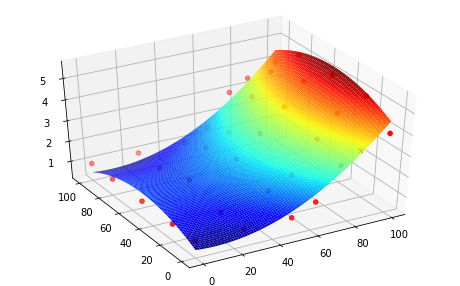

In [10]:
if __name__ == '__main__':
    X, Y, Z = read_csv()
    matching_3D(X,Y,Z)